In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load dataset
#you may have to download dataset at https://data.nysed.gov/downloads.php since those files are too big for github
df2015 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2015.csv')
df2016 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2016.csv')
df2017 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2017.csv')
df2018 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2018.csv')
df2019 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2019.csv')
df2020 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2020.csv')
df2021 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2021.csv')
df2022 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2022.csv')
df2015 = df2015.reset_index()
df2015.columns = df2015.columns.str.lower()
df2016 = df2016.reset_index()
df2016.columns = df2016.columns.str.lower()
df2017 = df2017.reset_index()
df2017.columns = df2017.columns.str.lower()
df2018 = df2018.reset_index()
df2018.columns = df2018.columns.str.lower()
df2019 = df2019.reset_index()
df2019.columns = df2019.columns.str.lower()

/var/folders/q4/81_jcq3x5gq9_2rd2gd_kqy80000gn/T/ipykernel_84382/393855885.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2016 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2016.csv')
/var/folders/q4/81_jcq3x5gq9_2rd2gd_kqy80000gn/T/ipykernel_84382/393855885.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2019 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2019.csv')
/var/folders/q4/81_jcq3x5gq9_2rd2gd_kqy80000gn/T/ipykernel_84382/393855885.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2020 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2020.csv')
/var/folders/q4/81_jcq3x5gq9_2rd2gd_kqy80000gn/T/ipykernel_84382/393855885.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2021 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2021.csv')
/var/folders/q4/81_jcq3x5gq9_2rd2gd_kqy8

In [4]:
print(df2020["membership_desc"].unique())
print(df2021["membership_desc"].unique())
print(df2022["membership_desc"].unique())
# subgroup_name
print(df2022["subgroup_name"].unique())

['2014 Total Cohort - 6 Year Outcome' '2015 Total Cohort - 5 Year Outcome'
 '2016 Total Cohort - 4 Year Outcome'
 '2015 Total Cohort - 5 Year Outcome - August 2020'
 '2016 Total Cohort - 4 Year Outcome - August 2020'
 '2014 Total Cohort - 6 Year Outcome - August 2020']
['2015 Total Cohort - 6 Year Outcome' '2016 Total Cohort - 5 Year Outcome'
 '2017 Total Cohort - 4 Year Outcome'
 '2016 Total Cohort - 5 Year Outcome - August 2021'
 '2017 Total Cohort - 4 Year Outcome - August 2021'
 '2015 Total Cohort - 6 Year Outcome - August 2021']
['2016 Total Cohort - 6 Year Outcome' '2017 Total Cohort - 5 Year Outcome'
 '2018 Total Cohort - 4 Year Outcome'
 '2017 Total Cohort - 5 Year Outcome - August 2022'
 '2018 Total Cohort - 4 Year Outcome - August 2022'
 '2016 Total Cohort - 6 Year Outcome - August 2022']
['All Students' 'Male' 'Female' 'General Education Students'
 'Students with Disabilities' 'American Indian or Alaska Native'
 'Asian or Native Hawaiian/Other Pacific Islander'
 'Black or Af

In [47]:

#compare_conditions are in column subgroup_name
# you can change Economically Disadvantaged to male/female, Parent in Armed Forces/Parent Not in Armed Forces
compare_conditions=["Economically Disadvantaged","Not Economically Disadvantaged","Male"]

#target value is value you want to see, 
target=["local_pct","grad_cnt","non_diploma_credential_cnt","dropout_cnt"]
value={}
years=[2015,2016,2017,2018,2019,2020,2021,2022]
for i in years:
    dfname=f"df{i}"
    year=i-6
    for condition in compare_conditions:
        result= f'{dfname}[\
            ({dfname}["membership_desc"]=="{year} Total Cohort - 6 Year Outcome")&\
            ({dfname}["subgroup_name"]=="{condition}")&\
            ({dfname}["aggregation_name"]=="All Districts and Charters")\
                ]'
        # print(f"for")
        result=eval(result)
        for t in target:
            v=result[t].iloc[0]
            if f'{condition} {t}' not in value.keys():
                value[f'{condition} {t}']=[]
                value[f'{condition} {t}'].append(v)
            else:
                value[f'{condition} {t}'].append(v)
            print(f"year {i} condition:{condition} target:{t} value:{v}")
    
print(value)

for key in value.keys():
    print(key)


year 2015 condition:Economically Disadvantaged target:local_pct value:7%
year 2015 condition:Economically Disadvantaged target:grad_cnt value:66893
year 2015 condition:Economically Disadvantaged target:non_diploma_credential_cnt value:1718
year 2015 condition:Economically Disadvantaged target:dropout_cnt value:13444
year 2015 condition:Not Economically Disadvantaged target:local_pct value:4%
year 2015 condition:Not Economically Disadvantaged target:grad_cnt value:113368
year 2015 condition:Not Economically Disadvantaged target:non_diploma_credential_cnt value:1621
year 2015 condition:Not Economically Disadvantaged target:dropout_cnt value:10840
year 2015 condition:Male target:local_pct value:6%
year 2015 condition:Male target:grad_cnt value:88713
year 2015 condition:Male target:non_diploma_credential_cnt value:2153
year 2015 condition:Male target:dropout_cnt value:13955
year 2016 condition:Economically Disadvantaged target:local_pct value:8%
year 2016 condition:Economically Disadvantag

In [35]:
def convert_str_to_num(s):
    # convert "14%" "99213" to 14 , 99213
    if "%" in s:
        s=s.strip("%")
    return int(s)

4
0
Economically Disadvantaged
Not Economically Disadvantaged
Male
1
Economically Disadvantaged
Not Economically Disadvantaged
Male
2
Economically Disadvantaged
Not Economically Disadvantaged
Male
3
Economically Disadvantaged
Not Economically Disadvantaged
Male


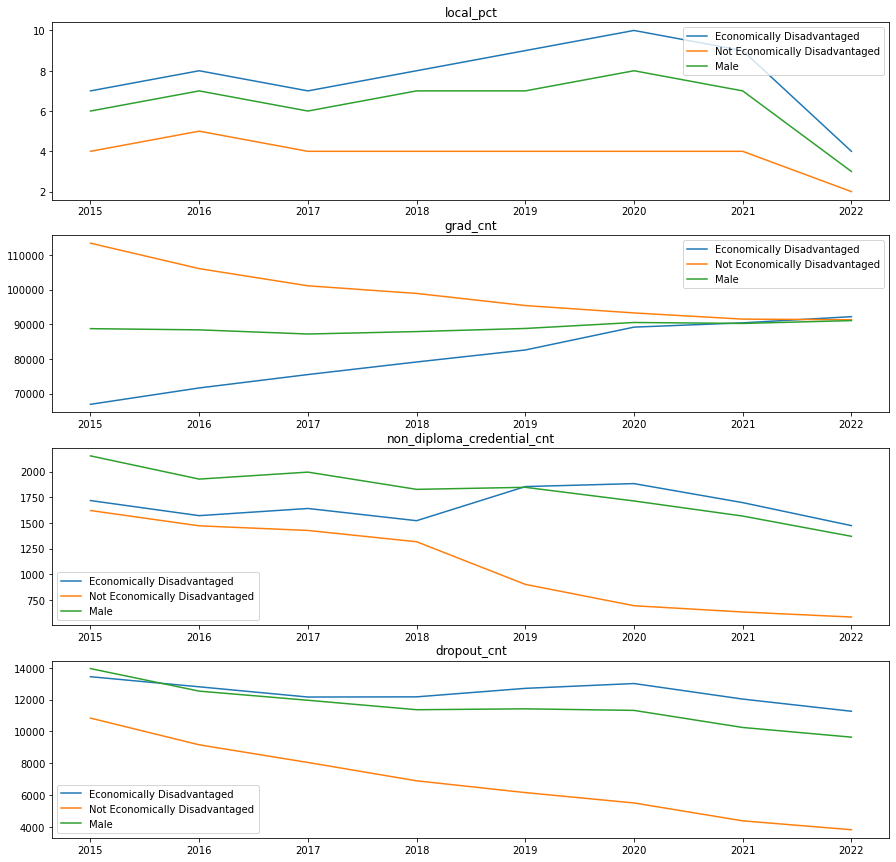

In [68]:

target_num=len(target)
print(target_num)
fig, axs = plt.subplots(target_num)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(target_num):
    print(i)
    for c in compare_conditions:
        # axs[i].legend(f"{c}",)
        print(c)
        axs[i].set_title(f'{target[i]}')
        key=f"{c} {target[i]}"
        x=years
        y=[convert_str_to_num(i) for i in value[key]]
        axs[i].plot(x, y)
    axs[i].legend([j for j in compare_conditions])



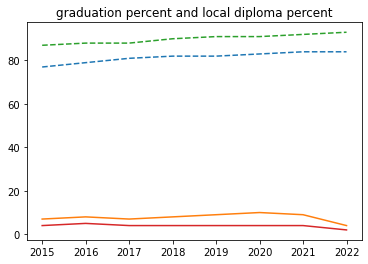

In [83]:
grad_pct_num=[]
for grad in grad_pct:
    grad_pct_num.append(int(grad.strip('%')))

local_pct_num=[]
for local in local_pct:
    local_pct_num.append(int(local.strip('%')))

n_grad_pct_num=[]
for grad in n_grad_pct:
    n_grad_pct_num.append(int(grad.strip('%')))

n_local_pct_num=[]
for local in n_local_pct:
    n_local_pct_num.append(int(local.strip('%')))
plt.title("graduation percent and local diploma percent")
plt.plot(years,grad_pct_num,linestyle='dashed')
plt.plot(years,local_pct_num)
plt.plot(years,n_grad_pct_num,linestyle='dashed')
plt.plot(years,n_local_pct_num)

In [31]:
for i in range(2015,2020):
   
    # print( f"df{i} = pd.read_csv('GRAD_RATE_AND_OUTCOMES_{i}.csv')")

    print(f"df{i} = df{i}.reset_index()")
    print(f"df{i}.columns = df{i}.columns.str.lower()")

df2015 = df2015.reset_index()
df2015.columns = df2015.columns.str.lower()
df2016 = df2016.reset_index()
df2016.columns = df2016.columns.str.lower()
df2017 = df2017.reset_index()
df2017.columns = df2017.columns.str.lower()
df2018 = df2018.reset_index()
df2018.columns = df2018.columns.str.lower()
df2019 = df2019.reset_index()
df2019.columns = df2019.columns.str.lower()
